# **Exp-2-PCM**

#**REG NO:212224060061**

#**NAME:DHARSANA A**

Quantization Levels: 8 (3 bits)
Sample Binary Stream (First 10): 100 101 110 111 111 111 110 100 011 001


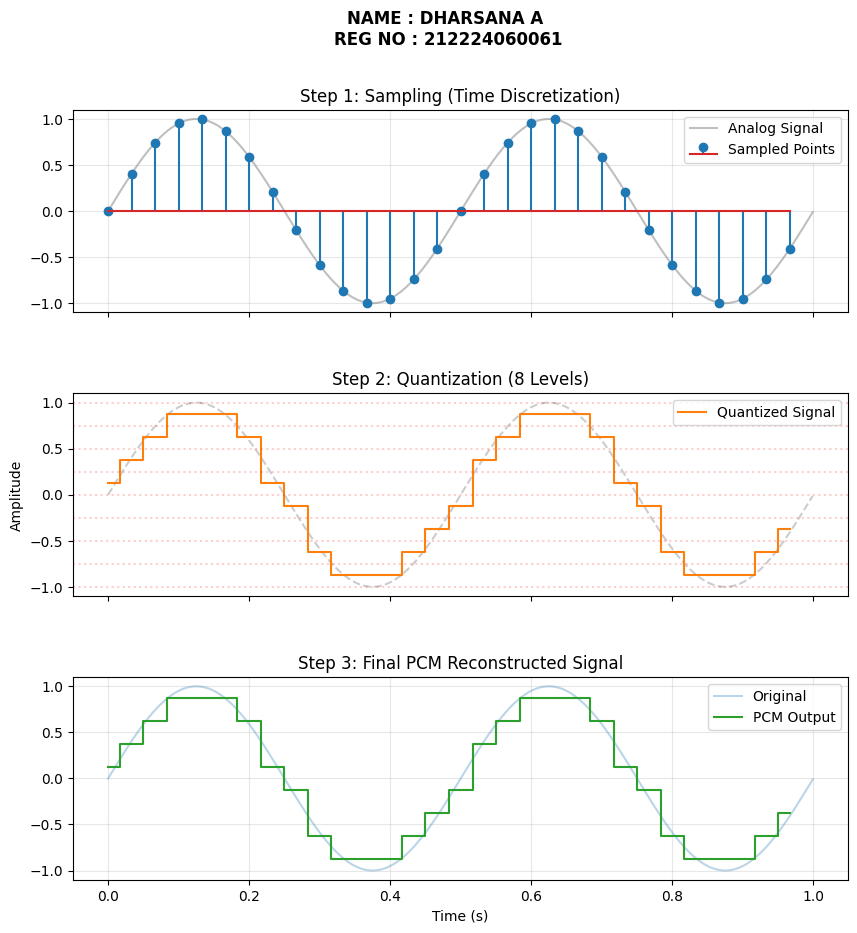

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ===== Signal Parameters =====
frequency = 2        # Hz
amplitude = 1
duration = 1         # Reduced for visual clarity
analog_rate = 1000   # "Continuous" signal resolution
sample_rate = 30     # Increased to better demonstrate sampling theorem
num_levels = 8       # 3-bit quantization

# ===== 1. Analog Signal Generation =====
t_analog = np.linspace(0, duration, int(analog_rate * duration), endpoint=False)
analog_signal = amplitude * np.sin(2 * np.pi * frequency * t_analog)

# ===== 2. Sampling (Discretizing Time) =====
t_samp = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
sampled_signal = amplitude * np.sin(2 * np.pi * frequency * t_samp)

# ===== 3. Quantization (Discretizing Amplitude) =====
# Step size calculation: Δ = (Max - Min) / L
v_min, v_max = -amplitude, amplitude
step_size = (v_max - v_min) / num_levels

# Quantization logic: Mid-rise
# Find which level index each sample falls into
indices = np.floor((sampled_signal - v_min) / step_size)
indices = np.clip(indices, 0, num_levels - 1).astype(int)

# Reconstruct the signal using the midpoint of each quantization level
quantized_signal = v_min + (indices + 0.5) * step_size

# ===== 4. PCM Encoding (Binary Conversion) =====
num_bits = int(np.log2(num_levels))
binary_codes = [np.binary_repr(i, width=num_bits) for i in indices]

print(f"Quantization Levels: {num_levels} ({num_bits} bits)")
print("Sample Binary Stream (First 10):", " ".join(binary_codes[:10]))

# ===== 5. Visualization =====
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
plt.subplots_adjust(hspace=0.4)
plt.suptitle("NAME : DHARSANA A \nREG NO : 212224060061",fontsize=12, fontweight='bold')

# Plot 1: Sampling
axes[0].plot(t_analog, analog_signal, label="Analog Signal", color='gray', alpha=0.5)
axes[0].stem(t_samp, sampled_signal, linefmt='C0-', markerfmt='C0o', label="Sampled Points")
axes[0].set_title("Step 1: Sampling (Time Discretization)")
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)

# Plot 2: Quantization

axes[1].plot(t_analog, analog_signal, 'k--', alpha=0.2)
axes[1].step(t_samp, quantized_signal, where='mid', color='C1', label="Quantized Signal")
# Draw horizontal lines for quantization levels
for level in np.linspace(v_min, v_max, num_levels + 1):
    axes[1].axhline(y=level, color='red', linestyle=':', alpha=0.2)
axes[1].set_title(f"Step 2: Quantization ({num_levels} Levels)")
axes[1].set_ylabel("Amplitude")
axes[1].legend(loc='upper right')

# Plot 3: Resulting Bitstream Visualization (Logic Representation)
axes[2].plot(t_analog, analog_signal, label="Original", alpha=0.3)
axes[2].step(t_samp, quantized_signal, where='mid', color='C2', label="PCM Output")
axes[2].set_title("Step 3: Final PCM Reconstructed Signal")
axes[2].set_xlabel("Time (s)")
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.show()